<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250> 
<b>Introduction to Jupyter Notebooks for Data Preview 0</b> <br>
Last verified to run on <b>TBD</b> with LSST Science Pipelines release <b>TBD</b> <br>
Contact author: Melissa Graham (mlg3k@uw.edu) <br>
Target audience: All DP0 delegates, especially those new to Notebooks. <br>
<br>
Questions welcome at <a href="https://community.lsst.org/c/support/dp0">community.lsst.org/c/support/dp0</a> <br>
Find DP0 documentation and resources at <a href="https://dp0-1.lsst.io">dp0-1.lsst.io</a> <br>

**Table of Contents**
1. Introduction<br>
 1.1 What is a Jupyter Notebook?<br>
 1.2 Emergency Stop a Notebook<br>
 1.3 Importing Python packages<br>
2. Catalog Access<br>
 2.1 Table Access Protocol (TAP) Service<br>
 2.2 Exploring catalog tables and columns with TAP<br>
 2.3 Retrieving data with TAP<br>
 2.4 Making a color-magnitude diagram<br>
3. Image Access<br>
 3.1 Finding and retrieving an image with the butler<br>
 3.2 Displaying an image with afwDisplay<br>

### 1.0 Introduction
This Jupyter Notebook will illustrate how Notebooks work, introduce you to a few Python packages, and show off a bit of the functionality of the Rubin Science Platform (RSP) and the DESC's Data Challenge 2 (DC2) simulated data set for Data Preview 0 (DP0).

**This Notebook does not go into much detail - it's more of an appetizer than an entree!** <br>
Once you've run through it, you might like to move on to: <br>
 - **TBD.ipynb**: A more thorough introduction to the TAP service.
 - **TBD.ipynb**: A more thorough guide to image access and display.
 - **TBD.ipynb**: An advanced guide to using the "Gen3 butler".

<!---
This is a markdown cell. Press shift-enter to execute, and see the formatted text appear.
-->
#### 1.1 What is a Jupyter Notebook?
Jupyter Notebooks are documents that contain a mix of code, output, visualizations, and narrative text. The most comprehensive source for documentation about Jupyter Notebooks is https://jupyter-notebook.readthedocs.io, but there are many great beginner-level tutorials and demos out there. Usually a web search of a question, like "how to make a latex equation in markdown jupyter notebook", will yield several good examples -- and if you're not already familiar with <a href="https://stackoverflow.com/">StackOverflow</a>, you may find yourself to be soon. 😄

Most briefly, a notebook is a series of cells. Double click on these words and you can see the markdown source code used to create it. 

*Action: Click in the following cell. When your cursor is in a cell, press "shift" and "enter" simultaneously to execute the cell code.*

In [1]:
# This is a code cell. Press shift-enter to execute.
# The # makes these lines comments, not code. They are not executed.
print('Hello, world!')

Hello, world!


#### 1.2 Emergency Stop a Notebook
If a code cell is taking a long time to execute (for example you accidentally tried to retrieve an entire catalog or tried to print 100,000 rows) and you need to kill it, go to Kernel --> Restart Kernel and Clear All Outputs. It might still take a few tens of seconds but it will stop the process.

#### 1.3 Importing Python packages
Here we import two very common Python packages in order to use their functionality. You will find that many Jupyter Notebooks start out by importing all the packages they will need, usually in the first code cell. In this tutorial we will import packages throughout, as they are needed.

You do not need to know anything about these packages to complete this tutorial, but here is a bit of extra information about `numpy` and `matplotlib` for new users. `numpy` is a fundamental package for scientific computing with arrays in Python. Its comprehensive documentation is available at <a href="https://numpy.org">numpy.org</a>, and it includes quickstart beginner guides. `matplotlib` is a comprehensive library for creating static, animated, and interactive visualizations in Python. Its comprehensive documentation is at <a href="https://matplotlib.org/">matplotlib.org</a>. The <a href="https://matplotlib.org/stable/gallery/index.html">matplotlib gallery</a> is a great place to start and leads directly to copy-and-pastable code.

*Action: Import the numpy and matplotlib packages.*

In [2]:
import numpy
print( 'numpy version: ', numpy.__version__ )

import matplotlib
print( 'matplotlib version: ', matplotlib.__version__ )
import matplotlib.pyplot as plt

numpy version:  1.20.2
matplotlib version:  3.4.2


<br> Whatever packages are imported, you can make a list of all their methods pop up on your screen by typing into a code cell: the package name, followed by a period, and then pressing tab. Try it! Put your cursor after the period and press tab. 

The # symbol is there because `numpy.` and `plt.` are not executable code statements. The # symbol makes those lines comments, not code. If the # were not there, this cell would fail to execute. Try it! Remove the #, press shift-enter, and watch it fail.

In [3]:
# numpy.
# plt.

You can also print the help documentation to screen. These help outputs are pretty long, so we've "commented out" most of the examples. Remove the # symbol for one of them, press shift-enter to execute the cell, and you will see the help documentation appear below the cell.

In [4]:
# help(numpy)
# help(matplotlib)
# help(numpy.abs)
# help(matplotlib.pyplot)

<br>

### 2.0 Catalog Access

#### 2.1 Table Access Protocol (TAP) Service

Table Access Procotol (TAP) provides standardized access the catalog data for discovery, search, and retrieval. Full <a href="http://www.ivoa.net/documents/TAP">documentation for TAP</a> is provided by the International Virtual Observatory Alliance (IVOA).

The TAP service uses a query language similar to SQL (Structured Query Langage) called ADQL (Astronomical Data Query Language). The <a href="http://www.ivoa.net/documents/latest/ADQL.html">documentation for ADQL</a> includes more information about syntax and keywords.

**Hazard Warning:** Not all ADQL functionality are supported yet in the DP0 RSP. 

*Action: Import the necessary packages and to start your TAP service. (No output).*

In [5]:
import pandas
pandas.set_option('display.max_rows', 1000)

from IPython.display import Markdown as md

# from rubin_jupyter_utils.lab.notebook import get_catalog, retrieve_query    
from rubin_jupyter_utils.lab.notebook import get_tap_service, retrieve_query    

# Deprecated
# service = get_catalog()
service = get_tap_service()

#### 2.2 Exploring catalog tables and columns with TAP
For this example we use the DESC DC2's `object` catalog, which contains sources detected in the coadded images (also called stacked or combined images). The `object` catalog is described in the <a href="https://arxiv.org/abs/2101.04855">DESC's DC2 data release note</a>, and more information about the simulated data in the <a href="https://ui.adsabs.harvard.edu/abs/2021ApJS..253...31L/abstract">DESC's DC2 paper</a>.

Results from a TAP service search are best displayed using one of two functions:<br>
.to_table() --> an AstroPy table (<a href="http://docs.astropy.org/en/stable/_modules/astropy/table/table.html">AstroPy Documentation</a>). <br>
.to_table().to_pandas() --> a Pandas dataframe (<a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html">Pandas Documentation</a>).

The next three executable cells give the barest of introductions for how to use the TAP service to discover what catalogs exist and which columns they contain. They are optional: remove the # in order to execute the code in the cell. Replace the # and re-execute to make the printout output go away.

*Action: Retrieve the table names and descriptions of available tables. Show the results as an AstroPy table.*

In [6]:
# results = service.search("SELECT description, table_name FROM TAP_SCHEMA.tables")
# results.to_table().show_in_notebook()

*Action: Print all columns names (field names) in the DP0.1 DC2 `object` catalog.*

In [7]:
# results = service.search("SELECT * from TAP_SCHEMA.columns WHERE table_name = 'dp01_dc2_catalogs.object'")
# print(results.fieldnames)

*Action: Retrieve the names, data types, description, and units for all columns in the `object` catalog. Show the results as an AstroPy table.*

In [8]:
# results = service.search("SELECT column_name, datatype, description, unit from TAP_SCHEMA.columns "\
#                          "WHERE table_name = 'dp01_dc2_catalogs.object'")
# results.to_table().show_in_notebook()

#### 2.3 Retrieving data with TAP

To quickly demonstrate how to retrive data from the `object` catalog, we use a cone search and request just 10 records. 

<b> Hazard Warning: </b> The DC2 `object` catalog contains ~147 million rows. Searches that do not specify a region and/or a maximum number of records can take a long time, and return far to many rows to display in a notebook.

Figure 2 of the <a href="https://ui.adsabs.harvard.edu/abs/2021ApJS..253...31L/abstract">DESC's DC2 paper</a> shows the sky region covered by DC2 simulation contains coordinates RA,Dec = 62,-37.
<br>

*Action: Retrieve coordinates and g,r,i magnitudes for 10 objects within a radius 0.5 degrees of 62,-37. Show the results as an AstroPy table.*

In [9]:
results = service.search("SELECT ra, dec, mag_g, mag_r, mag_i "\
                         "FROM dp01_dc2_catalogs.object "\
                         "WHERE CONTAINS(POINT('ICRS', ra, dec), CIRCLE('ICRS', 62.0, -37.0, 0.5)) = 1 ", maxrec=10)
results.to_table().show_in_notebook()

idx,ra,dec,mag_g,mag_r,mag_i
,deg,deg,mag,mag,mag
0,62.2295113,-37.3689118,26.2226891,25.6027494,24.969142
1,62.2053567,-37.2418218,26.9670622,26.939096,27.1247502
2,62.0434694,-37.3018805,26.8023253,26.8257602,26.9030173
3,62.212817,-37.3681377,26.5393218,27.3098974,26.4238937
4,62.1436692,-37.2817393,26.8943312,27.7877453,27.837352
5,61.9862986,-37.2426019,26.8471148,28.2039923,30.3065219
6,62.1815546,-37.3695525,26.9521396,26.6790006,26.6610401
7,62.0788152,-37.3023822,26.8337109,27.1511752,26.5917153
8,62.2303988,-37.3701648,25.9571375,26.0459008,26.0677388


#### 2.4 Making a color-magnitude diagram
As described in the <a href="https://arxiv.org/abs/2101.04855">DESC's DC2 data release note</a>, the DC2 `object` catalog contains two quality flags: the `good` and `clean` columns are true if the source had no bad pixels and was not skipped by the deblender. It also has a star/galaxy parameter, `extendedness`, which is 0 for stars (and 1 for extended objects). In addition to searching the catalog by coordinate, here we apply conditions for these parameters and search only for bright objects with low magnitude errors.

*Action: Retrieve magnitudes and their uncertainties for 10000 bright objects that are likely to be stars. (No output).* 

In [10]:
results = service.search("SELECT ra, dec, mag_g, mag_r, mag_i, magerr_g, magerr_r, magerr_i "\
                         "FROM dp01_dc2_catalogs.object "\
                         "WHERE CONTAINS(POINT('ICRS', ra, dec), CIRCLE('ICRS', 62.0, -37.0, 1.0)) = 1 "\
                         "AND good = 1 AND clean = 1 AND extendedness = 0 "\
                         "AND magerr_g < 0.1 AND magerr_r < 0.1 AND magerr_i < 0.1", maxrec=10000)

*Action: Put the results into a `pandas` dataframe for easy access to contents. (No output).*

In [11]:
data = results.to_table().to_pandas()

##### 2.4.1 A brief demo of some `pandas` package functionality.
If you're unfamiliar with `pandas`, here are some optional lines of code that demonstrate how to print the column names, the 'ra' column info, or the 'ra' column values. Uncomment one line at a time and execute the cell for output.

In [12]:
# data.columns
# data['ra']
# data['ra'].values

<br>

To make our diagram, we use the `plot` task of the `matplotlib.pyplot` package. The `plot` task parameters are described in full at <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot">this matplotlib website</a>, but briefly the are: x values, y values, symbol shape ('o' is circle), marker size (`ms`), and marker transparency (`alpha`).

*Action: Use `plt.plot` to display a color magnitude diagram.*

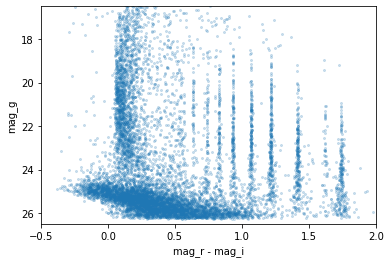

In [13]:
plt.plot( data['mag_r'].values-data['mag_i'].values, data['mag_g'].values, 'o', ms=2, alpha=0.2 )

# Label the axes.
plt.xlabel( 'mag_r - mag_i' )
plt.ylabel( 'mag_g' )

# Limit the x-axis.
plt.xlim([-0.5,2.0])

# Flip the y-axis.
plt.ylim([26.5,16.5])

plt.show()

Wow, maybe not what was expected? This plot generates many questions. Why are the colors quantized? Are those all really stars? All beyond the scope of this notebook tutorial, and left as topics of DP0 scientific analysis to be pursued by the delegate.

<br>

### 3.0 Image Access
The two most common types of images that DP0 delegates will interact with are `calexps` and `deepCoAdds`:
 * `calexp` -- a single image in a single filter
 * `deepCoadd` -- a combination of single images into a deep stack or CoAdd
 
The LSST Science Pipelines processes and stores images in `tracts` and `patches`:
 * `tract` -- a portion of sky within the LSST all-sky tessellation (sky map); divided into patches
 * `patch` -- a quadrilateral sub-region of a tract, of a size that fits easily into memory on desktop computers
 
To retrieve and display an image at a desired coordinate, users will have to specify their image type and the tract and patch they want. This tutorial demonstrates how to do that.

#### 3.1 Finding and retrieving an image with the `butler`
For DP0.1, images can only be accessed via the `butler` (<a href="https://pipelines.lsst.io/modules/lsst.daf.butler/index.html">documentation</a>), an LSST Science Pipelines software package to fetch the LSST data you want without you having to know its location or format.

The `butler` can also be used to explore and discover what data exists, and decide which images you want, as well as to  fetch the same type of catalog data that we used the TAP service for, above. Other DP0 tutorials will demonstrate the full butler functionality.

*Action: Import the LSST Science Pipelines package for the `butler`. (No output).*

In [14]:
import lsst.daf.butler as dafButler

*Action: Define the data repository and collection. (No output).* These will be the same for all DP0.1 data sets.

In [15]:
repo = 's3://butler-us-central1-dp01'  
collection='2.2i/runs/DP0.1'

*Action: Create an instance of the `butler` using the repo and collection. (No output).*

In [16]:
butler = dafButler.Butler(repo,collections=collection)

Found credentials in shared credentials file: /home/melissagraham/.lsst/aws-credentials.ini


In [17]:
# registry = butler.registry

For this example, let's retrieve an image of a cool-looking DC2 galaxy cluster that we already know is at coordinates: <br>RA = 03h42m59.0s, Dec = -32d16m09s. In decimal degrees these coordinates are 55.745834, -32.269167.

*Action: Use `lsst.geom` to define a SpherePoint for your coordinates.* (Full `lsst.geom` package <a href="https://pipelines.lsst.io/modules/lsst.geom/index.html">documentation</a>.)

In [18]:
import lsst.geom
my_spherePoint = lsst.geom.SpherePoint(55.745834*lsst.geom.degrees, -32.269167*lsst.geom.degrees)
print(my_spherePoint)

(55.7458340000, -32.2691670000)


*Action: Get the sky map from the `butler` and use `findTract` and `findPatch`.* (Full `skymap` <a href="http://doxygen.lsst.codes/stack/doxygen/x_masterDoxyDoc/skymap.html">documentation</a>.)

In [19]:
skymap = butler.get('skyMap')
my_tract = skymap.findTract(my_spherePoint)
my_patch = my_tract.findPatch(my_spherePoint)
print('my_tract = ', my_tract)
print('my_patch = ', my_patch)

my_tract =  TractInfo(id=4431)
my_patch =  PatchInfo(index=(3, 2))


<br>

**Hazard Warning:** Patch formats have changed. The (3,2) format for patches is formally deprecated (it is part of the "Generation 2" bulter). The new "Gen 3" format is a single integer. To convert from the "Gen 2" format of (i,j) to the "Gen 3" format, use (7 x j) + i. In this case, (7 x 2) + 3 = 17.

*Action: Use the butler to retrieve the deep i-band CoAdded image for the tract and patch. (No Output).*

In [20]:
dataId = {'band': 'i', 'tract': 4431, 'patch':17}
my_deepCoadd = butler.get('deepCoadd',dataId=dataId)

#### 3.2 Displaying an image with `afwDisplay`.
Image data retrieved with the butler can be displayed several different ways. A simple option is to use the LSST Science Pipelines package `afwDisplay`. There is some <a href="https://pipelines.lsst.io/modules/lsst.afw.display/index.html">documentation for afwDisplay</a> available, and other DP0 tutorials go into more detail about all the display options (e.g., overlaying mask data to show bad pixels).

*Action: Import the LSST Science Pipelines package for displaying images, and set the backend to `matplotlib`, which we have already imported. (No output).*

In [21]:
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib') 

*Action: Use afwDisplay to show the image data retrieved.* (Pateince; this takes a couple of seconds to render).

(11899.5, 16099.5, 7899.5, 12099.5)

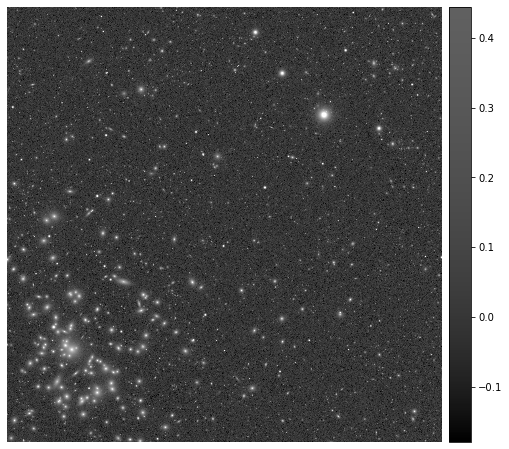

In [22]:
fig = plt.figure(figsize=(10,8))      # create a matplotlib.pyplot figure
afw_display = afwDisplay.Display(1)   # create an alias for the lsst.afw.display.Display() method
afw_display.scale('asinh', 'zscale')  # set the algorithm and scale for the pixel shading
afw_display.mtv(my_deepCoadd.image)   # display the image data you retrieved with the butler
plt.gca().axis('off')                 # turn off the x and y axes labels

<br>
To learn more about the imported `afwDisplay` package and its tasks, use the help function.

In [23]:
# help(afw_display.scale)
# help(afw_display.mtv)